<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Queens</font></h1>


## 1. Description of the problem and a discussion of the background

A got approached by a friend who wanted to open a __new restaurant in Queens__ (a borough of New York City). He wanted to open a __Chinese Restaurant__ or an __Indian Restaurant__. He wanted my help to decide. In addition, we wanted my help to decide in which neighborhood(s) he should/should not go for.

Queens is the largest borough in area and is the second-largest borough in population of the five New York City boroughs with a population of c. 2,2 million. 

#### Target Audience
In addition to my friend, there are others who would be interested in this project, e.g.:
* People who wants to invest in/open a restaurant.
* Aspiring data scientists who want to learn certain techniques/libraries used in this project.
* Tourists who want to know in which district of Queens they will find certain types of restaurants

#### Data
For this project I have used the following data:
1. New York City data that contains Borough, Neighborhoods along with there latitudes and longitudes
 * Data Source: https://cocl.us/new_york_dataset
 * Description: This data set contains the required information. I will use this data set to explore various neighborhoods of Queens.
2. Indian restaurants in Queens neighborhood of new york city.
 * Data Source: Foursquare API
 * Description: By using this API I will get all the venues in the Queens neighborhood. I will filter these venues for restaurants only.

## 2. Methodology

In this project, I will leverage the Foursquare API to explore neighborhoods in Queens (New York City). I will use the **explore** function to get the most common __restaurant__ categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. I will use the _k_-means clustering algorithm to complete this task. Finally, I will use the Folium library to visualize the neighborhoods in Queens and their emerging clusters.


### Preparation - download and import all required libraries

Before we get the data and start exploring it, let's download all the dependencies that we will need.


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib
import seaborn as sns
from matplotlib import pyplot as plt

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>


### Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web.


In [2]:
url = "https://cocl.us/new_york_dataset"
urllib.request.urlretrieve(url, "newyork_data.json")

print('Data downloaded!')

Data downloaded!


#### Load and explore the data


Next, let's load the data.


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a quick look at the data.


In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

Notice how all the relevant data is in the _features_ key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.


In [5]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.


In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a _pandas_ dataframe


The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [8]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.


In [9]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.


In [10]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.


In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


However, for analysis purposes, let's slice the original dataframe and create a new dataframe of the Queens data.


In [12]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


#### Use geopy library to get the latitude and longitude values of Queens.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [13]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7498243, -73.7976337.


In [14]:
# create map of Manhattan using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood.

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.


#### Define Foursquare Credentials and Version


In [15]:
CLIENT_ID = 'WP4YDVTCVO0IGAOOXUIJQKSTR4KF3O52PIGZGRLJKPIN3KMX' # your Foursquare ID
CLIENT_SECRET = 'LPCHB5FORQWBH5NJX5PVXYJMKYD5GO4F221EKDSKWMTMLM0Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WP4YDVTCVO0IGAOOXUIJQKSTR4KF3O52PIGZGRLJKPIN3KMX
CLIENT_SECRET:LPCHB5FORQWBH5NJX5PVXYJMKYD5GO4F221EKDSKWMTMLM0Q


### Explore Neighborhoods in queens


#### Let's create a function to repeat the same process to all the neighborhoods in queens


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called _queens_venues_.


In [17]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


#### Let's check the size of the resulting dataframe


In [18]:
print(queens_venues.shape)
queens_venues.head()

(2095, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


Let's check how many venues were returned for each neighborhood


In [19]:
queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,20,20,20,20,20,20
Astoria,100,100,100,100,100,100
Astoria Heights,13,13,13,13,13,13
Auburndale,20,20,20,20,20,20
Bay Terrace,37,37,37,37,37,37
Bayside,71,71,71,71,71,71
Bayswater,1,1,1,1,1,1
Beechhurst,16,16,16,16,16,16
Bellaire,13,13,13,13,13,13


#### Let's find out how many unique categories can be curated from all the returned venues


In [20]:
print('There are {} uniques categories.'.format(len(queens_venues['Venue Category'].unique())))

There are 277 uniques categories.


<a id='item3'></a>


### Analyze Each Neighborhood


In [21]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")
queens_onehot = queens_onehot.filter(regex='Restaurant$',axis=1)
# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Astoria,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.


In [22]:
queens_onehot.shape

(2095, 61)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [23]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arverne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.050000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000
1,Astoria,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000,0.000000,0.030000,0.000000,0.000000,0.000000,0.030000,0.000000,0.020000,0.020000,0.010000,0.00000,0.010000,0.000000,0.030000,0.010000,0.060000,0.01,0.000000,0.000000,0.000,0.000000,0.010000,0.00,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.010000,0.000000
2,Astoria Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
3,Auburndale,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.050000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Bay Terrace,0.000000,0.054054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Bayside,0.000000,0.028169,0.000000,0.000000,0.014085,0.000000,0.014085,0.000000,0.000000,0.042254,0.000000,0.00,0.000000,0.000000,0.

#### Let's confirm the new size


In [24]:
queens_grouped.shape

(81, 61)

#### Let's print each neighborhood along with the top 5 most common venues


In [25]:
num_top_venues = 5

for hood in queens_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = queens_grouped[queens_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
                 venue  freq
0      Thai Restaurant  0.05
1           Restaurant  0.05
2    Afghan Restaurant  0.00
3  Romanian Restaurant  0.00
4    Kosher Restaurant  0.00


----Astoria----
                       venue  freq
0  Middle Eastern Restaurant  0.06
1         Seafood Restaurant  0.04
2          Indian Restaurant  0.03
3           Greek Restaurant  0.03
4   Mediterranean Restaurant  0.03


----Astoria Heights----
                       venue  freq
0         Italian Restaurant  0.08
1         Chinese Restaurant  0.08
2          Afghan Restaurant  0.00
3         Seafood Restaurant  0.00
4  Latin American Restaurant  0.00


----Auburndale----
                  venue  freq
0    Italian Restaurant  0.10
1   American Restaurant  0.05
2      Sushi Restaurant  0.05
3  Fast Food Restaurant  0.05
4   Romanian Restaurant  0.00


----Bay Terrace----
                       venue  freq
0        American Restaurant  0.05
1     Gluten-free Restaurant  0.03
2        Romanian 

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Restaurant,Thai Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
1,Astoria,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Brazilian Restaurant,Latin American Restaurant,Thai Restaurant
2,Astoria Heights,Italian Restaurant,Chinese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
3,Auburndale,Italian Restaurant,American Restaurant,Sushi Restaurant,Fast Food Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
4,Bay Terrace,American Restaurant,Gluten-free Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,German Restaurant


<a id='item4'></a>


### Cluster Neighborhoods


A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The __Elbow Method__ is one of the most popular methods to determine this optimal value of k. I'm using the K-Means clustering technique from the Sklearn library

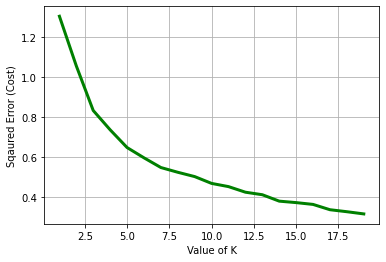

In [28]:
cost = []
queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

for i in range(1,20):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(queens_grouped_clustering)
    
    #calculates squared error
    #for the clustered points
    cost.append(KM.inertia_)

# plot the cost against K values
plt.plot(range(1,20), cost, color = 'g', linewidth = '3')
plt.xlabel('Value of K')
plt.ylabel('Sqaured Error (Cost)')
plt.grid()
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 7.

Run _k_-means to cluster the neighborhood into 5 clusters.

In [29]:
# set number of clusters
kclusters = 7

queens_grouped_clustering = queens_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 4, 6, 2, 6, 2, 4, 4, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

queens_merged = queens_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
queens_merged = queens_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

queens_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,2,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Brazilian Restaurant,Latin American Restaurant,Thai Restaurant
1,Queens,Woodside,40.746349,-73.901842,2,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Restaurant,Spanish Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Himalayan Restaurant
2,Queens,Jackson Heights,40.751981,-73.882821,2,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Mexican Restaurant,Thai Restaurant,Empanada Restaurant,Spanish Restaurant,Cuban Restaurant,Colombian Restaurant,Italian Restaurant
3,Queens,Elmhurst,40.744049,-73.881656,5,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Chinese Restaurant,South American Restaurant,Malay Restaurant,Argentinian Restaurant,Sushi Restaurant,Colombian Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,6,Italian Restaurant,Fast Food Restaurant,American Restaurant,Japanese Restaurant,Tapas Restaurant,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Filipino Restaurant


## 3. Result

We can start by visualizing the frequency of the 10 most frequently occuring restaurants in Queens, using seaborn/matplotlib packages.

In [31]:
queens_venues_restaurant = queens_venues[queens_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Top_10_restaurants = queens_venues_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Top_10_restaurants = Top_10_restaurants.reset_index()
Top_10_restaurants.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Top_10_restaurants

,Venue_Category,Frequency
0,Chinese Restaurant,63
1,Korean Restaurant,41
2,Italian Restaurant,38
3,Mexican Restaurant,30
4,Latin American Restaurant,30
5,Thai Restaurant,27
6,Sushi Restaurant,24
7,American Restaurant,20
8,Indian Restaurant,20
9,Fast Food Restaurant,19


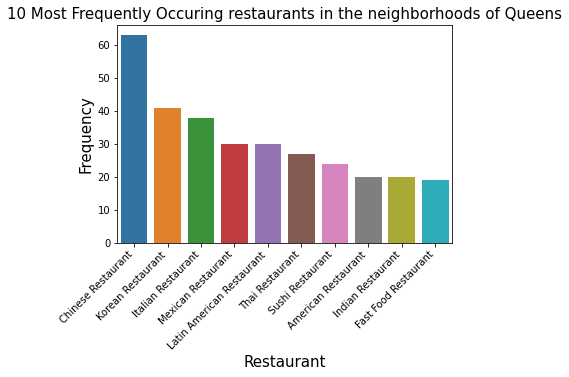

<Figure size 1296x504 with 0 Axes>

In [32]:
s=sns.barplot(x="Venue_Category", y="Frequency", data=Top_10_restaurants)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring restaurants in the neighborhoods of Queens', fontsize=15)
plt.xlabel("Restaurant", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

As seen, Chinese Restaurants is the most common restaurant in Queens, it's about three times more frequent than Indian Restaurants. This indicates that my friend might should open a Indian restaurant instead of a Chinese restaurant.

What we see in the table below the neighborhoods and their most common restaurants, and they now have been assigned seven different cluster labels from 0 to 6.

In [33]:
queens_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,2,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Brazilian Restaurant,Latin American Restaurant,Thai Restaurant
1,Queens,Woodside,40.746349,-73.901842,2,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Restaurant,Spanish Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Himalayan Restaurant
2,Queens,Jackson Heights,40.751981,-73.882821,2,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Mexican Restaurant,Thai Restaurant,Empanada Restaurant,Spanish Restaurant,Cuban Restaurant,Colombian Restaurant,Italian Restaurant
3,Queens,Elmhurst,40.744049,-73.881656,5,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Chinese Restaurant,South American Restaurant,Malay Restaurant,Argentinian Restaurant,Sushi Restaurant,Colombian Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,6,Italian Restaurant,Fast Food Restaurant,American Restaurant,Japanese Restaurant,Tapas Restaurant,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Filipino Restaurant


Finally, let's visualize the resulting clusters. We can now use the cluster labels to show the neighborhoods marked with a cluster-specific color on a map, again using folium:

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(queens_merged['Latitude'], queens_merged['Longitude'], queens_merged['Neighborhood'], queens_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


### Examine Clusters


Now, we can examine each cluster and determine the discriminating restaurant types that distinguish each cluster.


#### Cluster 1


In [35]:
queens_merged.loc[queens_merged['Cluster Labels'] == 0,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Briarwood,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
52,Floral Park,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
54,Jamaica Estates,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
68,Jamaica Hills,Indian Restaurant,Fast Food Restaurant,Southern / Soul Food Restaurant,Thai Restaurant,Halal Restaurant,Chinese Restaurant,Caribbean Restaurant,Falafel Restaurant,Filipino Restaurant,German Restaurant


As seen in the table above, all these neighborhoods got 'Indian Restaurant' as the most common restaurant type. This indicates that my friend shouldn't open the restaurant in these neighborhoods.

#### Cluster 2


In [36]:
queens_merged.loc[queens_merged['Cluster Labels'] == 1,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Murray Hill,Korean Restaurant,Japanese Restaurant,Asian Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant


#### Cluster 3


In [37]:
queens_merged.loc[queens_merged['Cluster Labels'] == 2,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Middle Eastern Restaurant,Seafood Restaurant,Greek Restaurant,Indian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Brazilian Restaurant,Latin American Restaurant,Thai Restaurant
1,Woodside,Thai Restaurant,Latin American Restaurant,Filipino Restaurant,American Restaurant,Restaurant,Spanish Restaurant,Japanese Restaurant,Fast Food Restaurant,Chinese Restaurant,Himalayan Restaurant
2,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Mexican Restaurant,Thai Restaurant,Empanada Restaurant,Spanish Restaurant,Cuban Restaurant,Colombian Restaurant,Italian Restaurant
6,Forest Hills,Thai Restaurant,Italian Restaurant,Asian Restaurant,Peruvian Restaurant,Chinese Restaurant,Restaurant,Greek Restaurant,Gluten-free Restaurant,Eastern European Restaurant,French Restaurant
8,Richmond Hill,Latin American Restaurant,Indian Restaurant,Spanish Restaurant,Caribbean Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
10,Long Island City,Mexican Restaurant,Italian Restaurant,Chinese Restaurant,Mediterranean Restaurant,Dumpling Restaurant,Indian Restaurant,Restaurant,Thai Restaurant,Brazilian Restaurant,Falafel Restaurant
14,Ridgewood,Greek Restaurant,Italian Restaurant,Korean Restaurant,Eastern European Restaurant,Restaurant,Mexican Restaurant,Sushi Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant
15,Glendale,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
17,Woodhaven,Restaurant,Thai Restaurant,Mexican Restaurant,Latin American Restaurant,Arepa Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,Dumpling Restaurant,German Restaurant
18,Ozone Park,Restaurant,Latin American Restaurant,Spanish Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant


#### Cluster 4


In [38]:
queens_merged.loc[queens_merged['Cluster Labels'] == 3,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,St. Albans,Caribbean Restaurant,Seafood Restaurant,Fast Food Restaurant,Chinese Restaurant,Southern / Soul Food Restaurant,Vietnamese Restaurant,Falafel Restaurant,Filipino Restaurant,French Restaurant,Eastern European Restaurant
39,Cambria Heights,Caribbean Restaurant,Restaurant,Chinese Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
59,Laurelton,Caribbean Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant


#### Cluster 5


In [39]:
queens_merged.loc[queens_merged['Cluster Labels'] == 4,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Corona,Mexican Restaurant,Chinese Restaurant,Empanada Restaurant,South American Restaurant,Italian Restaurant,Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Dumpling Restaurant
7,Kew Gardens,Chinese Restaurant,Indian Restaurant,New American Restaurant,South American Restaurant,Italian Restaurant,American Restaurant,Asian Restaurant,Brazilian Restaurant,Hotpot Restaurant,Himalayan Restaurant
9,Flushing,Hotpot Restaurant,Korean Restaurant,Chinese Restaurant,Asian Restaurant,Italian Restaurant,Dumpling Restaurant,Dim Sum Restaurant,Seafood Restaurant,Malay Restaurant,Sushi Restaurant
11,Sunnyside,Chinese Restaurant,Italian Restaurant,South American Restaurant,Latin American Restaurant,Fast Food Restaurant,Mexican Restaurant,Peruvian Restaurant,Seafood Restaurant,Restaurant,Caribbean Restaurant
12,East Elmhurst,American Restaurant,Latin American Restaurant,Chinese Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
13,Maspeth,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
24,Little Neck,Italian Restaurant,Chinese Restaurant,Korean Restaurant,Cantonese Restaurant,Shanghai Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Japanese Restaurant,Middle Eastern Restaurant
25,Douglaston,Chinese Restaurant,Italian Restaurant,Korean Restaurant,Greek Restaurant,Sushi Restaurant,Fast Food Restaurant,Eastern European Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant
29,Fresh Meadows,Chinese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Eastern European Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
32,Oakland Gardens,Korean Restaurant,Chinese Restaurant,Vietnamese Restaurant,Taiwanese Restaurant,Sushi Restaurant,Greek Restaurant,Halal Restaurant,Gluten-free Restaurant,Dumpling Restaurant,German Restaurant


#### Cluster 6

In [40]:
queens_merged.loc[queens_merged['Cluster Labels'] == 5,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Elmhurst,Thai Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indonesian Restaurant,Chinese Restaurant,South American Restaurant,Malay Restaurant,Argentinian Restaurant,Sushi Restaurant,Colombian Restaurant


#### Cluster 7

In [41]:
queens_merged.loc[queens_merged['Cluster Labels'] == 6,queens_merged.columns[[1] + list(range(5, queens_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Howard Beach,Italian Restaurant,Fast Food Restaurant,American Restaurant,Japanese Restaurant,Tapas Restaurant,Seafood Restaurant,Sushi Restaurant,Mexican Restaurant,Chinese Restaurant,Filipino Restaurant
16,Rego Park,Sushi Restaurant,Mediterranean Restaurant,Chinese Restaurant,Italian Restaurant,Japanese Restaurant,Kosher Restaurant,Shanghai Restaurant,Restaurant,American Restaurant,Cajun / Creole Restaurant
22,Bayside,Chinese Restaurant,Sushi Restaurant,Indian Restaurant,Italian Restaurant,Mexican Restaurant,American Restaurant,Greek Restaurant,Asian Restaurant,Cajun / Creole Restaurant,French Restaurant
23,Auburndale,Italian Restaurant,American Restaurant,Sushi Restaurant,Fast Food Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant
27,Bellerose,Italian Restaurant,American Restaurant,Seafood Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
28,Kew Gardens Hills,Sushi Restaurant,Restaurant,Vietnamese Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
44,Steinway,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant
58,Lindenwood,Japanese Restaurant,Indonesian Restaurant,Indian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant
72,Hunters Point,Italian Restaurant,Japanese Restaurant,American Restaurant,Asian Restaurant,Ramen Restaurant,Cuban Restaurant,French Restaurant,Greek Restaurant,Latin American Restaurant,Mexican Restaurant
76,Middle Village,Italian Restaurant,Sushi Restaurant,South American Restaurant,Dumpling Restaurant,Hotpot Restaurant,Himalayan Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant


## 4. Discussion

According to the analysis, my friend should open an Indian restaurant rather than a Chinese restaurant. In addition, my friend should not open an Indian restaurant in the neighborhoods of __Cluster 1__ as these have 'Indian Restaurant' as the most common restaurant type.

## 5. Conclusion

Finally, to conclude this project, I have got a small glimpse of how a real-life Data science project looks like. I have used some frequently used python libraries to scrap web-data, handle JSON files, use Foursquare API to explore the neighborhoods of Queens and plotting graphs.

This is just one example of fantastic data science use cases we can realize applying freely available technology.

## Acknowledgement & sources

A number of publications have inspired this piece of work and helped me develop the skills to run this analysis and the difficult coding behind. The courses of the __IBM Data Science Professional Certificate__ https://www.coursera.org/professional-certificates/ibm-data-science played an important role here.